# MovieLens 25M Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
file_paths = {
    "df1": "genome-tags.csv",
    "df2": "genome-scores.csv",
    "df3": "links.csv",
    "df4": "movies.csv",
    "df5": "tags.csv",
    "df6": "ratings.csv"
}

In [3]:
all_duplicates = {}

for df_name, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    
    duplicates = df[df.duplicated()]
    
    all_duplicates[df_name] = duplicates

for df_name, duplicates in all_duplicates.items():
    if not duplicates.empty:
        print(f"Duplicates found in {df_name}:")
        print(duplicates)
    else:
        print(f"No duplicates found in {df_name}.")

No duplicates found in df1.
No duplicates found in df2.
No duplicates found in df3.
No duplicates found in df4.
No duplicates found in df5.
No duplicates found in df6.


## Number of movies released per year 

In [19]:
df1 = pd.read_csv("genome-tags.csv")
df2 = pd.read_csv("genome-scores.csv")
df3 = pd.read_csv("links.csv")
df4 = pd.read_csv("movies.csv")
df5 = pd.read_csv("tags.csv")
df6 = pd.read_csv("ratings.csv")

In [23]:
merged_df = pd.merge(df5, df6, how="outer")
print(merged_df)

          userId  movieId               tag   timestamp  rating
0              3      260           classic  1439472355     NaN
1              3      260            sci-fi  1439472256     NaN
2              4     1732       dark comedy  1573943598     NaN
3              4     1732    great dialogue  1573943604     NaN
4              4     7569  so bad it's good  1573943455     NaN
...          ...      ...               ...         ...     ...
26093343  162541    50872               NaN  1240953372     4.5
26093344  162541    55768               NaN  1240951998     2.5
26093345  162541    56176               NaN  1240950697     2.0
26093346  162541    58559               NaN  1240953434     4.0
26093347  162541    63876               NaN  1240952515     5.0

[26093348 rows x 5 columns]


In [24]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# Print the updated DataFrame
print(merged_df)

          userId  movieId               tag           timestamp  rating
0              3      260           classic 2015-08-13 13:25:55     NaN
1              3      260            sci-fi 2015-08-13 13:24:16     NaN
2              4     1732       dark comedy 2019-11-16 22:33:18     NaN
3              4     1732    great dialogue 2019-11-16 22:33:24     NaN
4              4     7569  so bad it's good 2019-11-16 22:30:55     NaN
...          ...      ...               ...                 ...     ...
26093343  162541    50872               NaN 2009-04-28 21:16:12     4.5
26093344  162541    55768               NaN 2009-04-28 20:53:18     2.5
26093345  162541    56176               NaN 2009-04-28 20:31:37     2.0
26093346  162541    58559               NaN 2009-04-28 21:17:14     4.0
26093347  162541    63876               NaN 2009-04-28 21:01:55     5.0

[26093348 rows x 5 columns]


In [25]:
merged_df

,userId,movieId,tag,timestamp,rating
0,3,260,classic,2015-08-13 13:25:55,NaN
1,3,260,sci-fi,2015-08-13 13:24:16,NaN
2,4,1732,dark comedy,2019-11-16 22:33:18,NaN
3,4,1732,great dialogue,2019-11-16 22:33:24,NaN
4,4,7569,so bad it's good,2019-11-16 22:30:55,NaN
...,...,...,...,...,...
26093343,162541,50872,NaN,2009-04-28 21:16:12,4.5
26093344,162541,55768,NaN,2009-04-28 20:53:18,2.5
26093345,162541,56176,NaN,2009-04-28 20:31:37,2.0
26093346,162541,58559,NaN,2009-04-28 21:17:14,4.0


In [26]:
merged_df = merged_df.sort_values(by='timestamp', ascending=True)
print(merged_df.tail(10))
display(merged_df.shape)

          userId  movieId  tag           timestamp  rating
14301159   85523    59315  NaN 2019-11-21 09:09:53     4.0
14301178   85523   122912  NaN 2019-11-21 09:09:59     4.5
14301161   85523    60069  NaN 2019-11-21 09:10:06     4.5
14301191   85523   195165  NaN 2019-11-21 09:10:24     3.0
14301174   85523   109487  NaN 2019-11-21 09:10:45     4.5
14301186   85523   168252  NaN 2019-11-21 09:11:19     4.0
2377862     8642   202101  NaN 2019-11-21 09:11:52     2.0
14301199   85523   204704  NaN 2019-11-21 09:12:13     4.0
2377818     8642   122914  NaN 2019-11-21 09:12:29     4.0
14301183   85523   149406  NaN 2019-11-21 09:15:03     4.5


(26093348, 5)

In [27]:
merged_df.drop_duplicates(subset=['movieId'], inplace=True)
display(merged_df.shape)

(62423, 5)

In [28]:
merged_df

,userId,movieId,tag,timestamp,rating
1420168,2262,1079,NaN,1995-01-09 11:46:49,3.0
1420125,2262,47,NaN,1995-01-09 11:46:49,5.0
1420119,2262,21,NaN,1995-01-09 11:46:49,3.0
7728162,42937,32,NaN,1996-01-29 00:00:00,5.0
16938306,102689,1,NaN,1996-01-29 00:00:00,4.0
...,...,...,...,...,...
18957727,115835,209159,NaN,2019-11-20 20:16:25,3.0
2129972,6964,209163,NaN,2019-11-20 21:21:53,4.5
25168890,156433,208465,NaN,2019-11-20 21:51:54,4.5
19551245,119571,209169,NaN,2019-11-20 23:17:06,3.0


In [29]:
merged_df['year'] = merged_df['timestamp'].dt.year
movie_counts_per_year = merged_df.groupby('year')['movieId'].count().reset_index()

print(movie_counts_per_year)

    year  movieId
0   1995        3
1   1996     1380
2   1997      290
3   1998      665
4   1999      756
5   2000      833
6   2001      976
7   2002      941
8   2003     1147
9   2004     1299
10  2005      583
11  2006      372
12  2007      426
13  2008      923
14  2009     1924
15  2010     2176
16  2011     2049
17  2012     1688
18  2013     1836
19  2014     2462
20  2015     7764
21  2016     7544
22  2017     7759
23  2018    10600
24  2019     6027


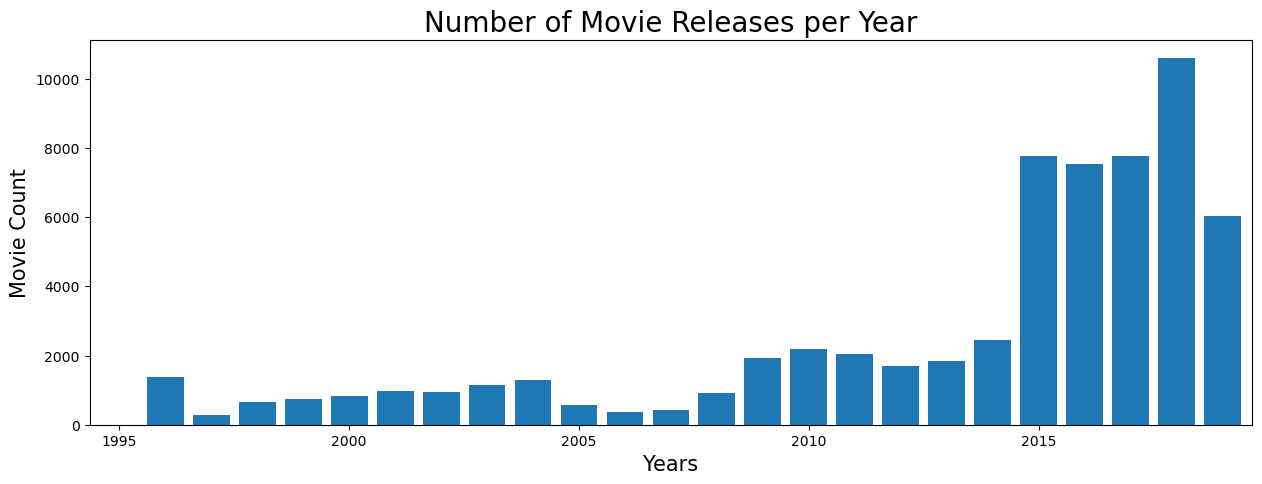

In [32]:
import matplotlib.pyplot as plt

merged_df['year'] = merged_df['timestamp'].dt.year
movie_counts_per_year = merged_df.groupby('year')['movieId'].count().reset_index()

plt.figure(figsize=(15,5))
plt.margins(x=0.01)
plt.bar(movie_counts_per_year['year'], movie_counts_per_year['movieId'])
plt.xlabel('Years', fontsize=15)
plt.ylabel('Movie Count', fontsize=15)
plt.title('Number of Movie Releases per Year', fontsize=20)
plt.show()

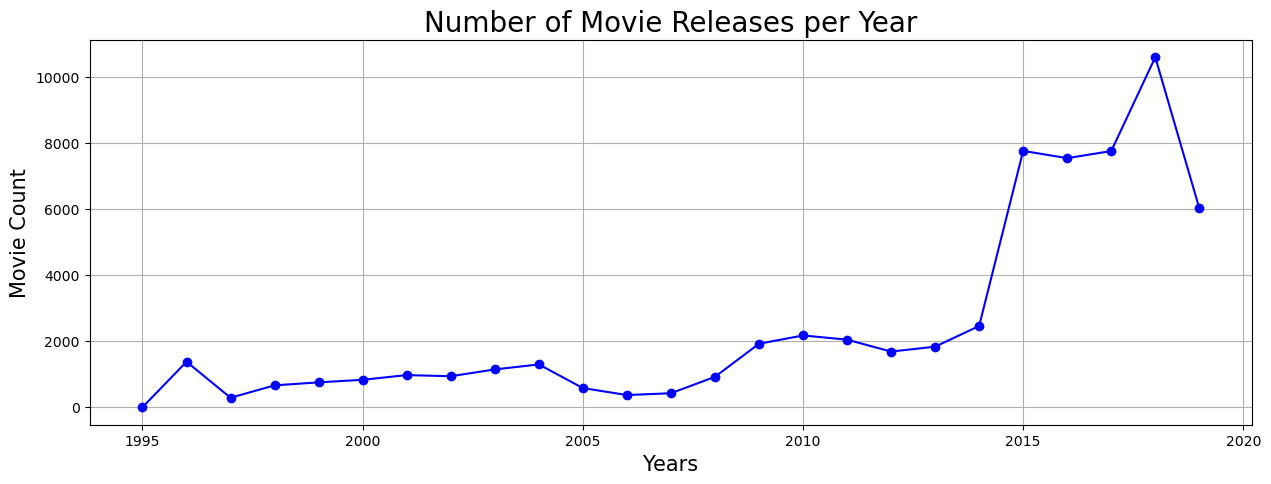

In [33]:
import matplotlib.pyplot as plt

merged_df['year'] = merged_df['timestamp'].dt.year
movie_counts_per_year = merged_df.groupby('year')['movieId'].count().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(movie_counts_per_year['year'], movie_counts_per_year['movieId'], marker='o', linestyle='-', color='b')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Movie Count', fontsize=15)
plt.title('Number of Movie Releases per Year', fontsize=20)
plt.grid(True)
plt.show()

## Percentage of change over time

In [34]:
movie_counts_per_year["percent_increase"] = movie_counts_per_year["movieId"].pct_change()
movie_counts_per_year["percent_increase"] = movie_counts_per_year["percent_increase"]*100
movie_counts_per_year.columns
display(movie_counts_per_year.head(10))
print(movie_counts_per_year.shape)

,year,movieId,percent_increase
0,1995,3,NaN
1,1996,1380,45900.000000
2,1997,290,-78.985507
3,1998,665,129.310345
4,1999,756,13.684211
5,2000,833,10.185185
6,2001,976,17.166867
7,2002,941,-3.586066
8,2003,1147,21.891605
9,2004,1299,13.251962


(25, 3)


## Most popular genre of movies 

In [42]:
df4 = pd.read_csv("movies.csv")

In [43]:
df4['genres'] = df4['genres'].str.split('|')

# Explode the genres column to create multiple rows for each genre
df4_exploded = df4.explode('genres')

# Remove duplicate titles
df4_exploded.drop_duplicates(subset='title', inplace=True)

# Count the occurrence of each genre
genre_counts = df4_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Sort the genre counts in descending order
sorted_genre_counts = genre_counts.sort_values('count', ascending=False)

# Select the top 10 most popular genres
top_10_genres = sorted_genre_counts.head(10)

# Create a new DataFrame with the top 10 genres
top_10_genres_df = pd.DataFrame(top_10_genres)

print(top_10_genres_df)

                genre  count
0               Drama  15297
1              Comedy  13651
2              Action   7340
3         Documentary   5197
4  (no genres listed)   5052
5              Horror   3444
6               Crime   3029
7           Adventure   2489
8           Animation   2089
9            Children   1366


In [44]:
top_10_genres_df

,genre,count
0,Drama,15297
1,Comedy,13651
2,Action,7340
3,Documentary,5197
4,(no genres listed),5052
5,Horror,3444
6,Crime,3029
7,Adventure,2489
8,Animation,2089
9,Children,1366


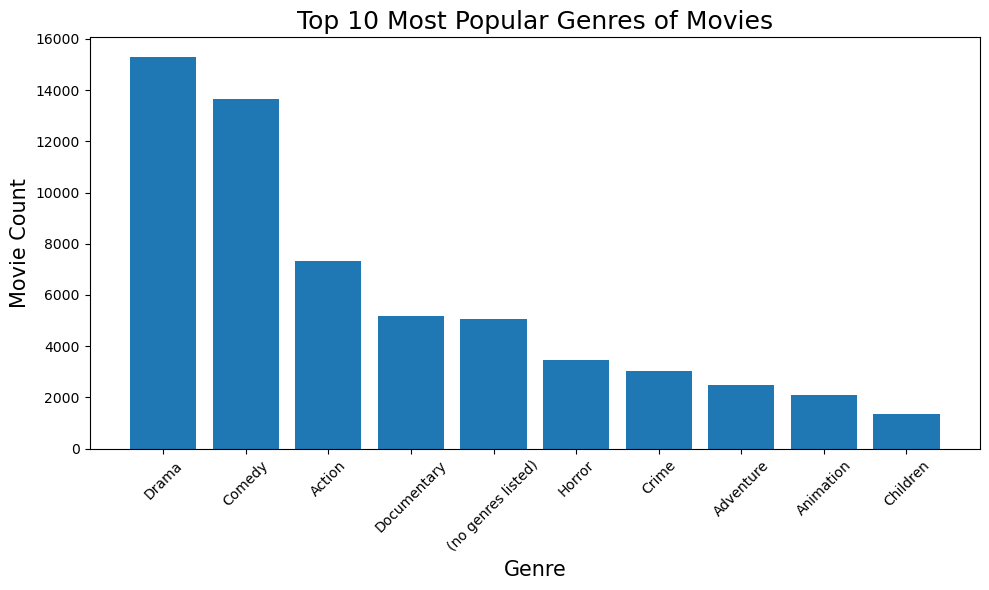

In [47]:
df4 = pd.read_csv("movies.csv")

# Split the genres column into separate genre tags
df4['genres'] = df4['genres'].str.split('|')

# Explode the genres column to create multiple rows for each genre
df4_exploded = df4.explode('genres')

# Remove duplicate titles
df4_exploded.drop_duplicates(subset='title', inplace=True)

# Count the occurrence of each genre
genre_counts = df4_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Sort the genre counts in descending order
sorted_genre_counts = genre_counts.sort_values('count', ascending=False)

# Select the top 10 most popular genres
top_10_genres = sorted_genre_counts.head(10)

# Create a new DataFrame with the top 10 genres
top_10_genres_df = pd.DataFrame(top_10_genres)

# Plot the genres as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_genres_df['genre'], top_10_genres_df['count'])
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Movie Count', fontsize=15)
plt.title('Top 10 Most Popular Genres of Movies', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Does the taste of movies changes over time?

In [64]:
df4 = pd.read_csv('movies.csv')

# Split the genres column into separate genre tags
df4['genres'] = df4['genres'].str.split('|')

# Extract the year from the title column
df4['year'] = df4['title'].str.extract(r'\((\d{4})\)', expand=False)

# Explode the genres column to create multiple rows for each genre
df4_exploded = df4.explode('genres')

# Group the data by year and genre, and count the occurrences
genre_counts_per_year = df4_exploded.groupby(['year', 'genres']).size().reset_index(name='count')

# For each year, find the genre with the maximum count
most_popular_genre_per_year = genre_counts_per_year.groupby('year')['count', 'genres'].max().reset_index()

# Print the result without the title column
print(most_popular_genre_per_year[['year', 'genres', 'count']])

     year              genres  count
0    1874         Documentary      1
1    1878  (no genres listed)      1
2    1880         Documentary      1
3    1883  (no genres listed)      1
4    1887  (no genres listed)      1
..    ...                 ...    ...
130  2015             Western    926
131  2016             Western    891
132  2017             Western    864
133  2018             Western    737
134  2019             Western    387

[135 rows x 3 columns]


C:\Users\Jordan\AppData\Local\Temp\ipykernel_2756\2129983887.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_popular_genre_per_year = genre_counts_per_year.groupby('year')['count', 'genres'].max().reset_index()


### The movie taste of the people was consistent from year 1924 to 2004 as western movies dominants

In [87]:
most_popular_genre_per_year[['year', 'genres']][1:60]

,year,genres
1,1878,(no genres listed)
2,1880,Documentary
3,1883,(no genres listed)
4,1887,(no genres listed)
5,1888,Documentary
6,1890,Comedy
7,1891,Documentary
8,1892,Animation
9,1894,Drama
10,1895,Sci-Fi


In [88]:
most_popular_genre_per_year[['year', 'genres']][61:120]

,year,genres
61,1946,Western
62,1947,Western
63,1948,Western
64,1949,Western
65,1950,Western
66,1951,Western
67,1952,Western
68,1953,Western
69,1954,Western
70,1955,Western


In [89]:
most_popular_genre_per_year[['year', 'genres']][120:]

,year,genres
120,2005,Western
121,2006,Western
122,2007,Western
123,2008,Western
124,2009,Western
125,2010,Western
126,2011,Western
127,2012,Western
128,2013,Western
129,2014,Western


In [96]:
df6

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


## Top 20 rated movies 

In [100]:
df4 = pd.read_csv("movies.csv")
df6 = pd.read_csv("ratings.csv")

display(df4.head(10))
display(df6.head(10))
merged_df = pd.merge(df4,df6, how='inner', on='movieId')

display(merged_df.shape)
merged_df.drop_duplicates(subset=['timestamp'], inplace=True)
display(merged_df.shape)

ratings_count = merged_df.groupby('title')['rating'].count()
ratings_mean = merged_df.groupby('title')['rating'].mean()

sorted_ratings_count = ratings_count.sort_values(ascending=False)
top_sorted_ratings_count = sorted_ratings_count.iloc[0:20]

top_sorted_ratings_count_frame = pd.DataFrame(top_sorted_ratings_count)
ratings_mean_frame = pd.DataFrame(ratings_mean)

merged_df2 = pd.merge(top_sorted_ratings_count_frame,ratings_mean_frame, how='inner', on='title')

ratings_average = top_sorted_ratings_count_frame.mean()
display(merged_df2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


(25000095, 6)

(20115267, 6)

,rating_x,rating_y
title,,
"Shawshank Redemption, The (1994)",68646,4.401327
Forrest Gump (1994),66583,4.038140
Pulp Fiction (1994),65324,4.217562
Star Wars: Episode IV - A New Hope (1977),61939,4.104942
"Matrix, The (1999)",61616,4.135647
Toy Story (1995),57301,3.893623
"Silence of the Lambs, The (1991)",55212,4.103229
Braveheart (1995),53821,3.979227
Fight Club (1999),53242,4.235481


In [101]:
merged_df2_sorted = merged_df2.sort_values('rating_y', ascending=False)
display(merged_df2_sorted)

,rating_x,rating_y
title,,
"Shawshank Redemption, The (1994)",68646,4.401327
"Godfather, The (1972)",45769,4.305065
"Usual Suspects, The (1995)",49489,4.280103
Fight Club (1999),53242,4.235481
Pulp Fiction (1994),65324,4.217562
Schindler's List (1993),48870,4.192787
"Matrix, The (1999)",61616,4.135647
Star Wars: Episode V - The Empire Strikes Back (1980),46065,4.116108
Star Wars: Episode IV - A New Hope (1977),61939,4.104942


(3.5, 5.0)

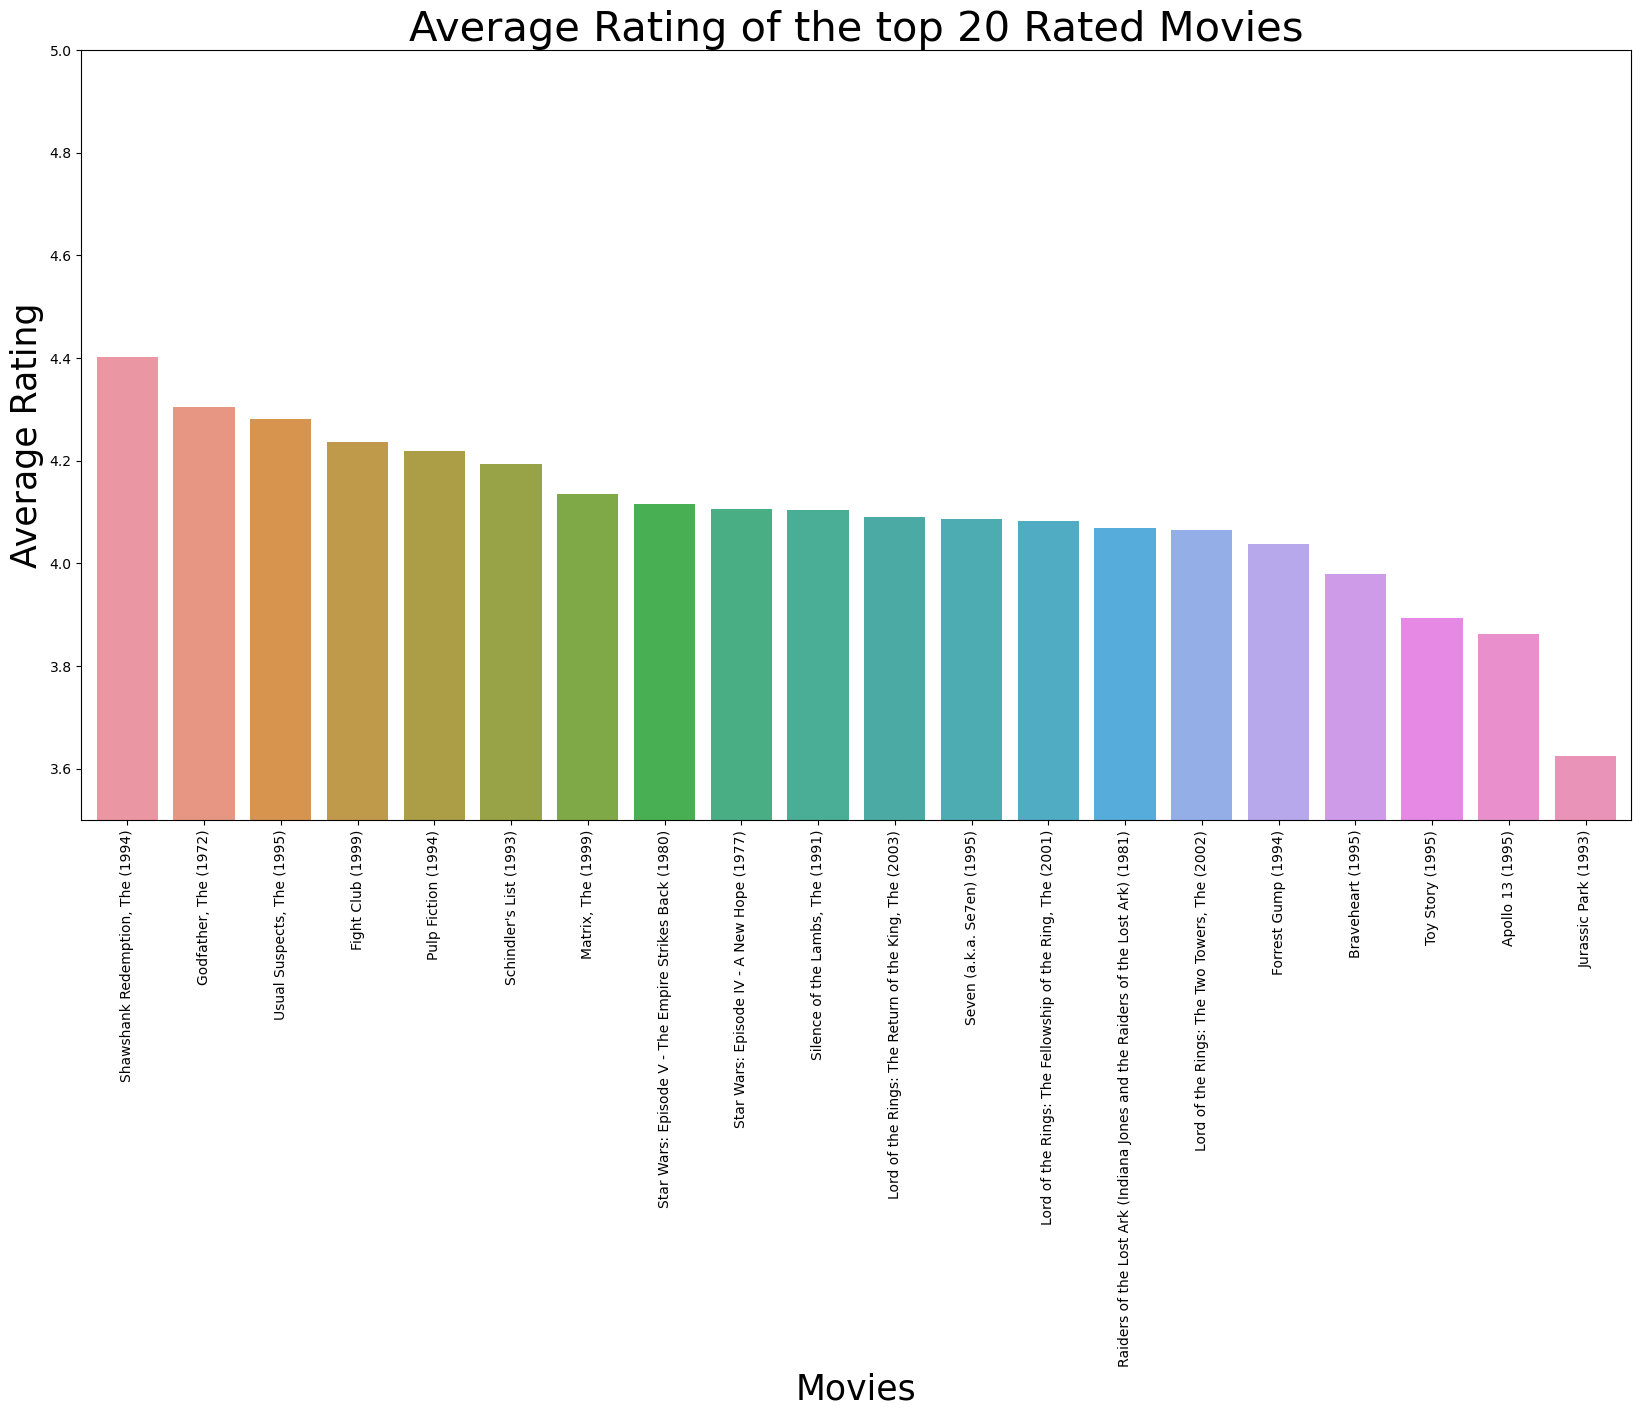

In [102]:
plt.figure(figsize=(20,10))
sns.barplot(x=merged_df2_sorted.index, y='rating_y', data = merged_df2_sorted)

plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.title("Average Rating of the top 20 Rated Movies", fontsize=30)
plt.xlabel("Movies", fontsize=25)            
plt.ylabel("Average Rating", fontsize=25)
plt.ylim(3.5,5)

## Most popular season for releasing movies 

In [103]:
merged_df = pd.merge(df5, df6, how="outer")
print(merged_df)

          userId  movieId               tag   timestamp  rating
0              3      260           classic  1439472355     NaN
1              3      260            sci-fi  1439472256     NaN
2              4     1732       dark comedy  1573943598     NaN
3              4     1732    great dialogue  1573943604     NaN
4              4     7569  so bad it's good  1573943455     NaN
...          ...      ...               ...         ...     ...
26093343  162541    50872               NaN  1240953372     4.5
26093344  162541    55768               NaN  1240951998     2.5
26093345  162541    56176               NaN  1240950697     2.0
26093346  162541    58559               NaN  1240953434     4.0
26093347  162541    63876               NaN  1240952515     5.0

[26093348 rows x 5 columns]


In [104]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# Print the updated DataFrame
print(merged_df)

          userId  movieId               tag           timestamp  rating
0              3      260           classic 2015-08-13 13:25:55     NaN
1              3      260            sci-fi 2015-08-13 13:24:16     NaN
2              4     1732       dark comedy 2019-11-16 22:33:18     NaN
3              4     1732    great dialogue 2019-11-16 22:33:24     NaN
4              4     7569  so bad it's good 2019-11-16 22:30:55     NaN
...          ...      ...               ...                 ...     ...
26093343  162541    50872               NaN 2009-04-28 21:16:12     4.5
26093344  162541    55768               NaN 2009-04-28 20:53:18     2.5
26093345  162541    56176               NaN 2009-04-28 20:31:37     2.0
26093346  162541    58559               NaN 2009-04-28 21:17:14     4.0
26093347  162541    63876               NaN 2009-04-28 21:01:55     5.0

[26093348 rows x 5 columns]


In [105]:
merged_df = merged_df.sort_values(by='timestamp', ascending=True)
print(merged_df.tail(10))
display(merged_df.shape)

          userId  movieId  tag           timestamp  rating
14301159   85523    59315  NaN 2019-11-21 09:09:53     4.0
14301178   85523   122912  NaN 2019-11-21 09:09:59     4.5
14301161   85523    60069  NaN 2019-11-21 09:10:06     4.5
14301191   85523   195165  NaN 2019-11-21 09:10:24     3.0
14301174   85523   109487  NaN 2019-11-21 09:10:45     4.5
14301186   85523   168252  NaN 2019-11-21 09:11:19     4.0
2377862     8642   202101  NaN 2019-11-21 09:11:52     2.0
14301199   85523   204704  NaN 2019-11-21 09:12:13     4.0
2377818     8642   122914  NaN 2019-11-21 09:12:29     4.0
14301183   85523   149406  NaN 2019-11-21 09:15:03     4.5


(26093348, 5)

In [106]:
merged_df.drop_duplicates(subset=['movieId'], inplace=True)
display(merged_df.shape)

(62423, 5)

In [107]:
merged_df.head(10)

,userId,movieId,tag,timestamp,rating
1420168,2262,1079,NaN,1995-01-09 11:46:49,3.0
1420125,2262,47,NaN,1995-01-09 11:46:49,5.0
1420119,2262,21,NaN,1995-01-09 11:46:49,3.0
7728162,42937,32,NaN,1996-01-29 00:00:00,5.0
16938306,102689,1,NaN,1996-01-29 00:00:00,4.0
20324602,124805,10,NaN,1996-01-29 00:00:00,3.0
20324603,124805,11,NaN,1996-01-29 00:00:00,4.0
20324607,124805,45,NaN,1996-01-29 00:00:00,5.0
20324608,124805,58,NaN,1996-01-29 00:00:00,5.0
12125744,71732,19,NaN,1996-01-29 00:00:00,1.0


In [108]:
import datetime

merged_df["timestamp"] = pd.to_datetime(merged_df['timestamp'], unit='s')
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df.head(10)

,userId,movieId,tag,timestamp,rating,year,month
1420168,2262,1079,NaN,1995-01-09 11:46:49,3.0,1995,1
1420125,2262,47,NaN,1995-01-09 11:46:49,5.0,1995,1
1420119,2262,21,NaN,1995-01-09 11:46:49,3.0,1995,1
7728162,42937,32,NaN,1996-01-29 00:00:00,5.0,1996,1
16938306,102689,1,NaN,1996-01-29 00:00:00,4.0,1996,1
20324602,124805,10,NaN,1996-01-29 00:00:00,3.0,1996,1
20324603,124805,11,NaN,1996-01-29 00:00:00,4.0,1996,1
20324607,124805,45,NaN,1996-01-29 00:00:00,5.0,1996,1
20324608,124805,58,NaN,1996-01-29 00:00:00,5.0,1996,1
12125744,71732,19,NaN,1996-01-29 00:00:00,1.0,1996,1


In [111]:
months_initial = merged_df['month'].unique()
merged_df['month'] = merged_df['month'].astype(str)
print(months_initial)
months_final = {'1': "January", '2': "February", '3': "March", '4': "April", '5': "May", '6': "June", '7': "July", '8': "August",
 '9': "September", '10': "October", '11': "November", '12': "December"}

merged_df['month'] = merged_df['month'].replace(months_final)
months_final = merged_df['month'].unique()
print(months_final)

monthly_movies = merged_df.groupby('month')[['movieId']].count()
display(monthly_movies)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


,movieId
month,
April,4145
August,4945
December,4472
February,5058
January,5028
July,4899
June,4540
March,4973
May,9809


In [112]:
monthly_movies_sorted = monthly_movies.sort_values('movieId', ascending=False)
monthly_movies_sorted["released_in_millions"] = monthly_movies_sorted["movieId"]/1000000
display(monthly_movies_sorted)

,movieId,released_in_millions
month,,
May,9809,0.009809
October,5135,0.005135
February,5058,0.005058
January,5028,0.005028
March,4973,0.004973
August,4945,0.004945
July,4899,0.004899
November,4822,0.004822
September,4597,0.004597


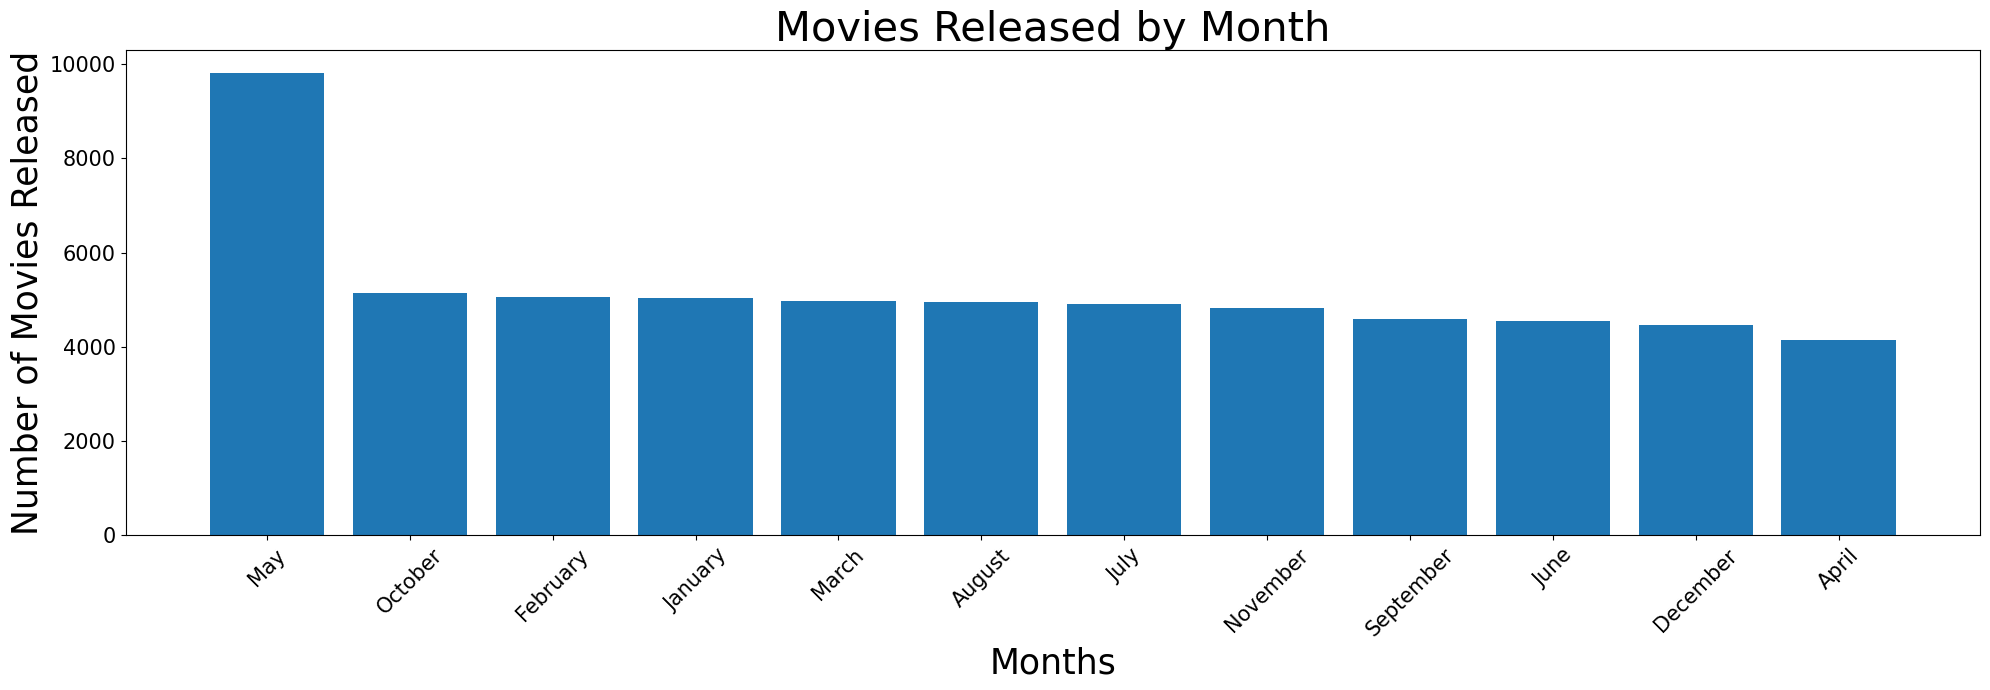

In [114]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'monthly_movies_sorted'
plt.figure(figsize=(20, 7))
plt.bar(monthly_movies_sorted.index, monthly_movies_sorted["movieId"])

plt.title("Movies Released by Month", fontsize=30)
plt.xlabel("Months", fontsize=25)
plt.ylabel("Number of Movies Released", fontsize=25)

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()
